In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.datasets import load_iris

In [80]:
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [82]:
# Пошук оптимальної кількості кластерів методом ліктя
wcss = []  # Within-cluster sum of squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

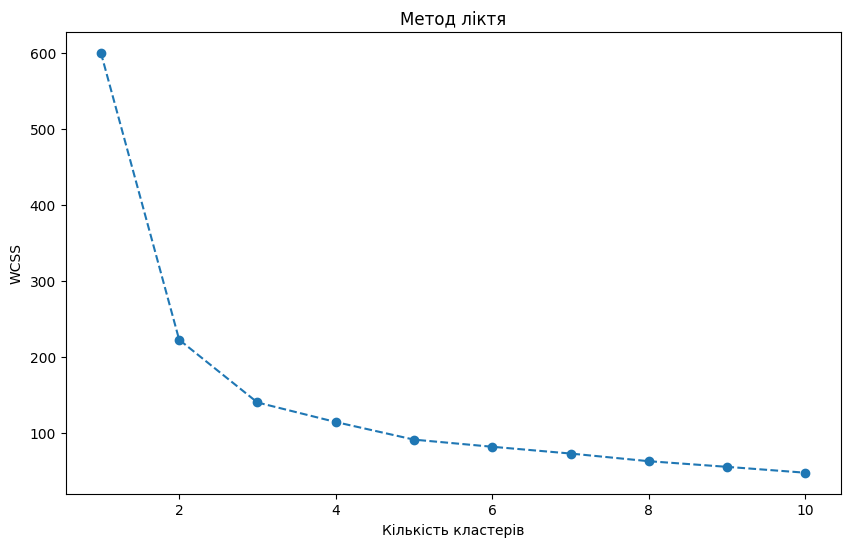

In [83]:
# Візуалізація методу ліктя

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

In [84]:
# Пошук оптимальної кількості кластерів методом силуетів
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

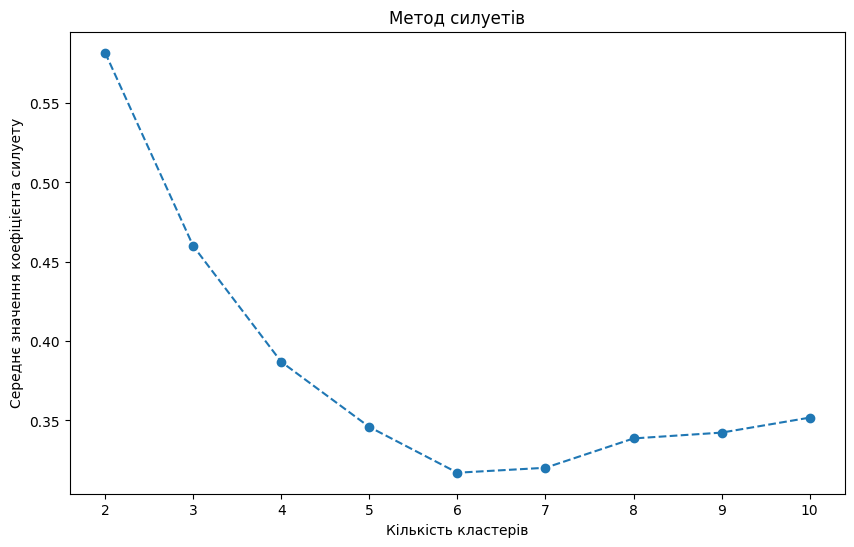

In [85]:
# Візуалізація методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середнє значення коефіцієнта силуету')
plt.show()

In [86]:
def find_elbow(wcss):
    x = range(1, len(wcss) + 1)
    # Обчислення перших похідних
    first_derivative = np.diff(wcss)
    # Обчислення других похідних
    second_derivative = np.diff(first_derivative)
    # Знаходження індексу з найбільшою другою похідною
    optimal_k = np.argmax(second_derivative) + 2  # +2 через зміщення диференціювання
    return optimal_k

optimal_clusters = find_elbow(wcss)
print(f'Оптимальна кількість кластерів за методу ліктя: {optimal_clusters}')
print(f"Оптимальна кількість кластерів за методом силуетів: {np.argmax(silhouette_scores) + 2}")

Оптимальна кількість кластерів за методу ліктя: 2
Оптимальна кількість кластерів за методом силуетів: 2


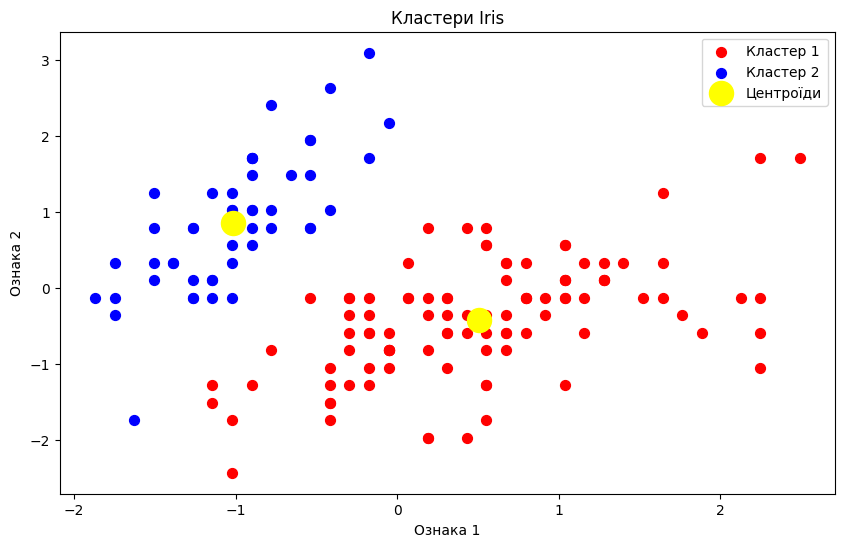

In [87]:
# Виконання кластеризації з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Візуалізація кластерів
plt.figure(figsize=(10, 6))

# Відобразимо перші дві ознаки для простоти візуалізації
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=50, c='red', label='Кластер 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=50, c='blue', label='Кластер 2')

# Візуалізація центроїдів кластерів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Центроїди')
plt.title('Кластери Iris')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.legend()
plt.show()